In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2512, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 2512 (delta 33), reused 149 (delta 29), pack-reused 2344
Receiving objects: 100% (2512/2512), 69.67 MiB | 17.12 MiB/s, done.
Resolving deltas: 100% (1114/1114), done.


In [2]:
%ls

DeOldify/  sample_data/


In [3]:
cd DeOldify/

/content/DeOldify


In [4]:
!ls

colab_requirements.txt			ImageColorizer.ipynb
ColorFIDBenchmarkArtistic.ipynb		ImageColorizerStableTests.ipynb
ColorizeTrainingArtistic.ipynb		LICENSE
ColorizeTrainingStable.ipynb		MANIFEST.in
ColorizeTrainingStableLargeBatch.ipynb	README.md
ColorizeTrainingVideo.ipynb		requirements-dev.txt
ColorizeTrainingWandb.ipynb		requirements.txt
deoldify				resource_images
environment.yml				setup.py
fastai					test_images
fid					tox.ini
ImageColorizerArtisticTests.ipynb	VideoColorizerColab.ipynb
ImageColorizerColab.ipynb		VideoColorizer.ipynb
ImageColorizerColabStable.ipynb


In [5]:
%pip install -r colab_requirements.txt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 237 kB 32.4 MB/s 
     |████████████████████████████████| 125 kB 52.1 MB/s 
     |████████████████████████████████| 2.7 MB 20.3 MB/s 
     |████████████████████████████████| 631 kB 68.0 MB/s 
     |████████████████████████████████| 355 kB 5.5 MB/s 
     |████████████████████████████████| 218 kB 76.1 MB/s 
     |████████████████████████████████| 357 kB 74.8 MB/s 
     |████████████████████████████████| 112 kB 75.0 MB/s 
     |████████████████████████████████| 2.3 MB 61.5 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=2b3b90380467c9fd035c33df3d9c0d86ef42490b8ee4bbf9dafad90056a4694f
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=ba4da4db487f0aa637c9e

In [6]:
%mkdir 'models' 
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth 

--2022-08-12 10:28:38--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 5.9.140.253
Connecting to data.deepai.org (data.deepai.org)|5.9.140.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  15.1MB/s    in 17s     

2022-08-12 10:28:57 (14.1 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [7]:
from PIL import Image

from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)
import torch
import fastai
from deoldify.visualize import *
import collections
import sys

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.


INFO:root:Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt


Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt


INFO:root:Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt


Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt


In [8]:
if not torch.cuda.is_available():
    print('GPU not available.')

In [9]:
torch.backends.cudnn.benchmark = True
collections.Sized = collections.abc.Sized
sys.path.append('./DeOldify')

In [10]:
 colorizer = get_image_colorizer(artistic=True) 

/content/DeOldify/fastai/data_block.py:451: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/content/DeOldify/fastai/data_block.py:454: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_chec

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [11]:
%cd ..
!ls

/content
DeOldify  sample_data


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!ls

DeOldify  drive  sample_data


In [14]:
%cd drive/MyDrive/Colab\ Notebooks/Color_img/
!ls

/content/drive/MyDrive/Colab Notebooks/Color_img
1.jpg  Color_img_Egor.ipynb  color_img.ipynb  models  result_images


In [15]:
%mkdir result_images

mkdir: cannot create directory ‘result_images’: File exists


In [16]:
 image_path = r'1.jpg'

PosixPath('result_images/1.jpg')

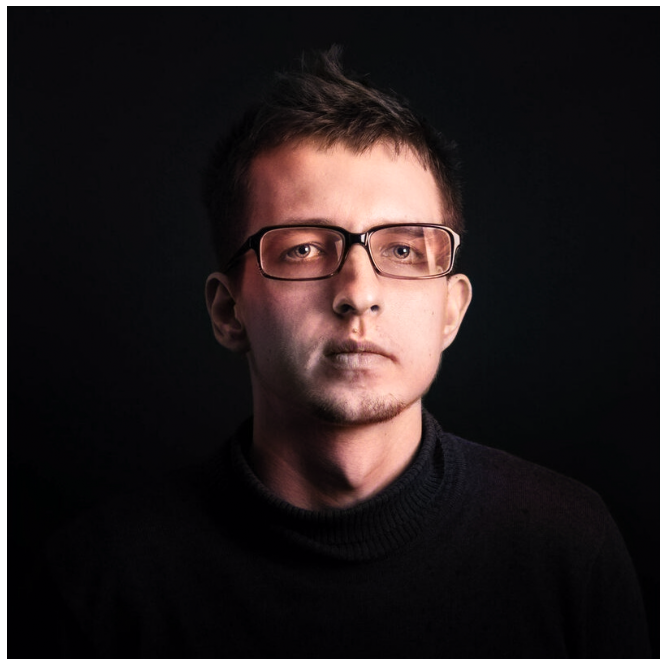

In [18]:
colorizer.plot_transformed_image(image_path, render_factor=35, display_render_factor=False, figsize=(12,12))